# Diving into the Stackoverflow 2019 survey with open source library Quantipy

Quantipy is an open source software library specifically targeted at survey data. It offers a rich meta-data system and offers support for native handling of special data types like multiple choice variables, statistical analysis using case or observation weights, pretty data exports.

In this first in a series of posts, we will use Quantipy to analyze results from the Stackoverflow 2019 developer survey. Almost 90,000 developers answered the survey, telling Stackoverflow about their attitudes towards technology, what tools they use and what they want.

## Loading data in to Quantipy
We start by loading two datasets into Quantipy. We've previously converted the CSV data Stackoverflow make publicly available into two Quantipy files, a CSV with the data and a json file with the meta-data. We've also filtered these into two seperate datasets. One contains all answers in the survey, and the other one only has answers from people who said their organisation is using the Blockchain in some way. 

In [70]:
import quantipy_notebook as qpn
from quantipy_notebook.plot import *
from quantipy_notebook.calculate import *


In [71]:
ds_all = qp.DataSet("Stackoverflow 2019")
ds_all.read_quantipy('data/final/stackoverflow2019.json', 'data/final/stackoverflow2019.csv')

ds_btc = qp.DataSet("Blockchain implementers 2019")
ds_btc.read_quantipy('data/final/stackoverflow2019-filter-blockchain.json', 
                     'data/final/stackoverflow2019-filter-blockchain.csv')

b'DataSet: data/final/Stackoverflow 2019\nrows: 88883 - columns: 95\nDimensions compatibility mode: True'
b'DataSet: data/final/Blockchain implementers 2019\nrows: 8635 - columns: 93\nDimensions compatibility mode: True'


## Blockchain: attitudes and adoption
Our angle in this analysis is based on two questions asked about Blockchain, the technology that powers Bitcoin among other things. The survey had two questions about Blockchain, one about whether a respondent's organisation was using it and another about whether it was useful or a waste of resources.

We use the first question to divide the respondents into two groups. One group has all developers and the other has those who said they work for an organisation that is 
 * implementing crypto-currency based products, 
 * implementing their own crypto-currency or
 * applying blockchain technology for non currency applications

We do a quick sanity check to see what the distribution looks like, by looking at the variable we filtered by in the dataset that has all respondents.

In [72]:
ds_all.meta("BlockchainOrg")
ds_all.meta("BlockchainIs")

single,codes,texts,missing
BlockchainOrg: How is your organization thinking about or implementing blockchain technology?,,,
1,1,Accepting Bitcoin or other coins and tokens as...,None
2,2,Implementing cryptocurrency-based products,None
3,3,Implementing our own cryptocurrency,None
4,4,Non-currency applications of blockchain,None
5,5,Not at all,None


single,codes,texts,missing
BlockchainIs: Blockchain / cryptocurrency technology is primarily:,,,
1,1,A passing fad,None
2,2,An irresponsible use of resources,None
3,3,Useful across many domains and could change ma...,None
4,4,"Useful for decentralized currency (i.e., Bitcoin)",None
5,5,Useful for immutable record keeping outside of...,None


We recode the three answers we are defining people by into a new variable, `BlockchainOrg_rec` and look at the results.

In [73]:
ds_all.crosstab('BlockchainOrg_rec')

Question                                                        BlockchainOrg_rec. Is your organisation using blockchain?
Values                                                                                                                  @
Question                                           Values                                                                
BlockchainOrg_rec. Is your organisation using b... All                                                     48175.0       
                                                   Accepting                                                 994.0       
                                                   Implementing                                             8635.0       
                                                   No                                                      38546.0

## Blockchain the world over

Where in the world is blockchain popular? We compare the distribution of programmers across countries for all respondends on one hand, and respondents who work in organisations that are im plementing block chain on the other. Then we plot the 15 countries where most developers reside and compare the percentages of the two groups.

In [74]:
compare = compare_crosstabs([
    ds_btc.crosstab('Country', pct=True), 
    ds_all.crosstab('Country', pct=True)],
    ['Blockchain devs',"Everyone"]
)

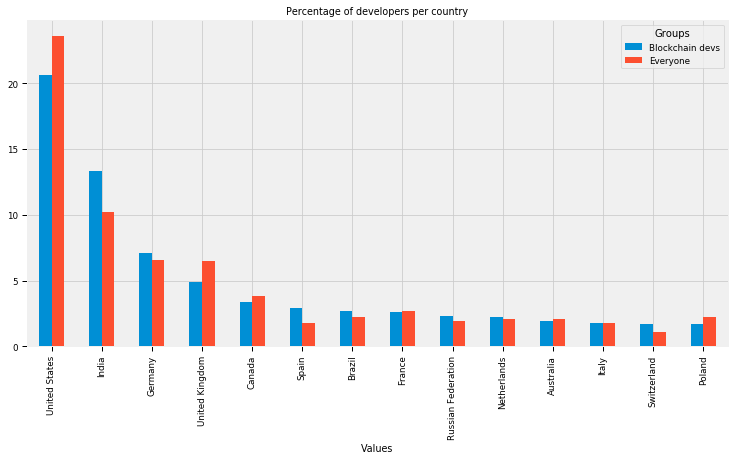

In [75]:
barplot(compare.sort_values(by=compare.columns[0],ascending=False).iloc[0:15,:],orient='v', title="Percentage of developers per country")


Of everyone who answered the survey, 23.6% are from the US and 10.2% are from India. Of all the Blockchain developers, a higher proportion of respondents are from India, or 13.2%.

We fetch a crosstab of Blockchain opinion and country

In [76]:
worry_by_country= ds_all.crosstab("BlockchainIs_rec","Country",rules=True)
worry_by_country

Question                                                           Country. In which country do you currently reside?                                                                                             ...                                                                                                                                                
Values                                                                                                            All Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda Argentina Armenia Australia  ... United Kingdom United Republic of Tanzania United States Uruguay Uzbekistan Venezuela, Bolivarian Republic of... Viet Nam Yemen Zambia Zimbabwe
Question                         Values                                                                                                                                                                           ...                                                                                                                                                
BlockchainIs_rec. Blockchain is? All                                                                          60165.0        19.0    46.0    52.0     7.0    2.0                 7.0     374.0    50.0    1468.0  ...         4318.0                        19.0       15553.0    63.0       19.0                                 72.0    117.0   5.0    7.0     27.0
                                 A passing fad                                                                10085.0         5.0     9.0     6.0     1.0    0.0                 1.0      37.0     4.0     327.0  ...         1020.0                         3.0        3381.0    10.0        1.0                                  5.0      8.0   0.0    1.0      0.0
                                 An irresponsible use of resources                                             9364.0         2.0     3.0     4.0     4.0    0.0                 1.0      38.0     4.0     249.0  ...          838.0                         1.0        2603.0     5.0        3.0                                  2.0      8.0   1.0    0.0      1.0
                                 Useful                                                                       40716.0        12.0    34.0    42.0     2.0    2.0                 5.0     299.0    42.0     892.0  ...         2460.0                        15.0        9569.0    48.0       15.0                                 65.0    101.0   4.0    6.0     26.0

[4 rows x 180 columns]

We only want countries where more than 100 people responded

In [77]:
valid = (worry_by_country.loc[('BlockchainIs_rec. Blockchain is?','All'),:]>100)

Then we do the crosstab again, except this time ask for percentages. We use the valid series to drop countries with too few responses. Remember, we are calculating percentages within each country, so this doesn't effect the result.

In [78]:
worry_pct = ds_all.crosstab("BlockchainIs_rec","Country",pct=True) 

In [79]:
worry_pct = worry_pct.loc[:,valid]

In [80]:
least_worried = worry_pct.loc[('BlockchainIs_rec. Blockchain is?','An irresponsible use of resources'),:].sort_values()
most_worried = worry_pct.loc[('BlockchainIs_rec. Blockchain is?','An irresponsible use of resources'),:].sort_values(ascending=False)

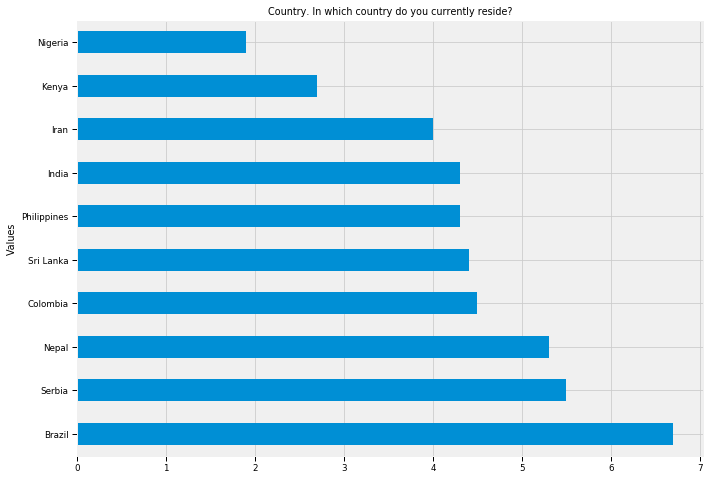

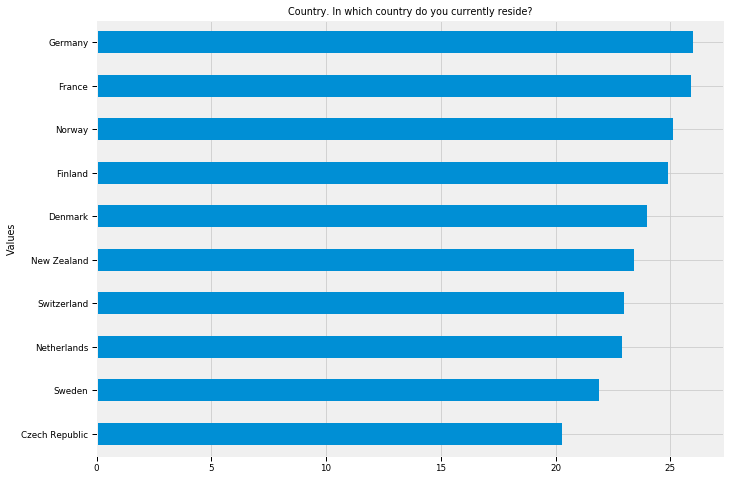

In [81]:
barplot(least_worried[0:10],sort="descending")
barplot(most_worried[0:10],sort="ascending")

In [82]:
compare_crosstabs([ds_all.crosstab("BlockchainIs",pct=True),ds_btc.crosstab("BlockchainIs",pct=True)],["Everyone", "Blockchain devs"])

Question                                                                                                Groups                
Values                                                                                                Everyone Blockchain devs
Question                                           Values                                                                     
BlockchainIs. Blockchain / cryptocurrency techn... All                                                   100.0           100.0
                                                   A passing fad                                          16.8            10.1
                                                   An irresponsible use of resources                      15.6             7.9
                                                   Useful across many domains and could change man...     29.2            33.4
                                                   Useful for decentralized currency (i.e., Bitcoin)      12.2             7.9
                                                   Useful for immutable record keeping outside of ...     26.2            40.7

In [83]:
ds_all.crosstab("BlockchainIs_rec","grouped_experience",pct=False).T

Question                                                              BlockchainIs_rec. Blockchain is?                                                         
Values                                                                                             All A passing fad An irresponsible use of resources   Useful
Question                                           Values                                                                                                      
grouped_experience. How many years have you bee... All                                         59829.0       10033.0                            9299.0  40497.0
                                                   Less than 5 years                           10346.0        1364.0                             873.0   8109.0
                                                   5-9                                         18217.0        2875.0                            2262.0  13080.0
                                                   10-19                                       19228.0        3548.0                            3376.0  12304.0
                                                   20-29                                        7573.0        1392.0                            1742.0   4439.0
                                                   30-39                                        3602.0         685.0                             867.0   2050.0
                                                   More than 40 years                            863.0         169.0                             179.0    515.0

In [84]:
ds_all.crosstab("BlockchainIs_rec","grouped_age",pct=True).T

Question                                BlockchainIs_rec. Blockchain is?                                                       
Values                                                               All A passing fad An irresponsible use of resources Useful
Question                Values                                                                                                 
grouped_age. Age groups All                                        100.0          16.8                              15.8   67.4
                        Younger than 15                            100.0          15.8                               9.0   75.2
                        15-19                                      100.0          15.3                              10.6   74.1
                        20-24                                      100.0          15.2                              11.3   73.4
                        25-29                                      100.0          16.9                              13.7   69.4
                        30-34                                      100.0          17.6                              18.3   64.1
                        35-39                                      100.0          17.8                              19.9   62.3
                        40-44                                      100.0          16.8                              22.3   60.9
                        45-49                                      100.0          17.5                              21.3   61.2
                        50-54                                      100.0          19.4                              20.8   59.8
                        55-59                                      100.0          20.3                              19.0   60.8
                        60+                                        100.0          19.5                              18.0   62.6

# General demographics

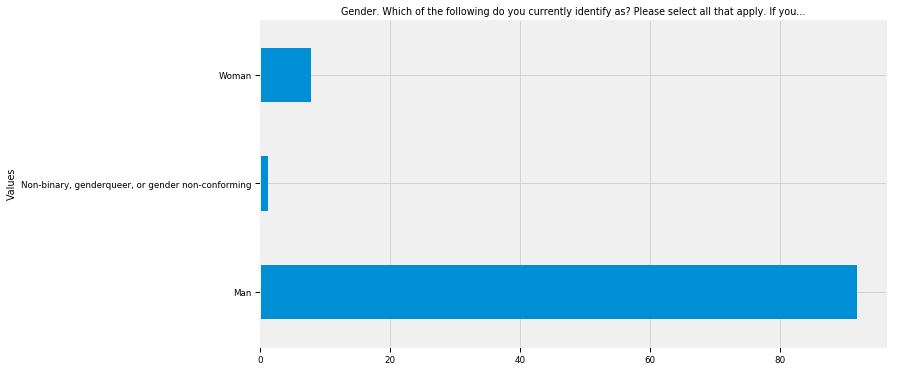

In [85]:
barplot(ds_all.crosstab('Gender',pct=True))

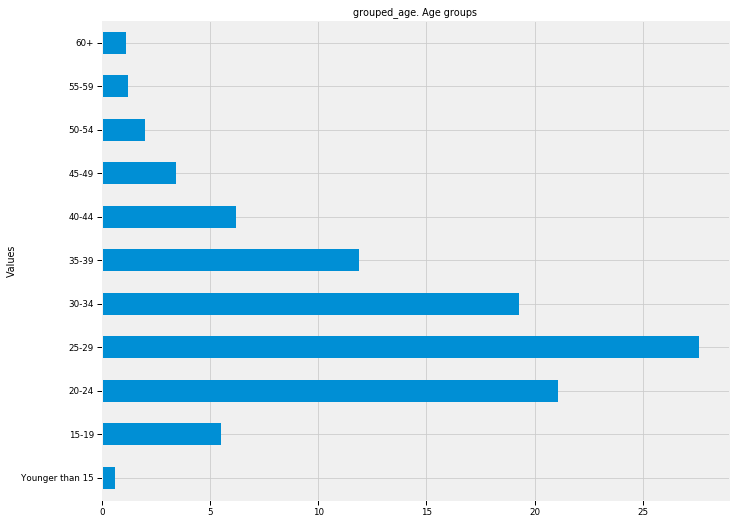

In [86]:
barplot(ds_all.crosstab("grouped_age",pct=True))

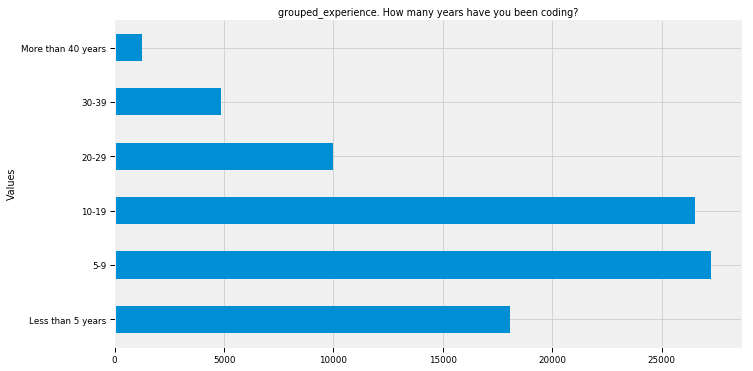

In [87]:
barplot(ds_all.crosstab("grouped_experience"))